In [111]:
# Import necessary libraries for data manipulation
import pandas as pd
import numpy as np

# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler
import joblib

#### Data Exploration and Understanding

##### Load the Data

In [112]:
filepath = 'my_diabetes_prediction_data.csv'

In [113]:
# Load the Dataset
data = pd.read_csv(filepath)

##### Explore the Data

In [114]:
# Display the first few rows of the dataset to get an overview
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,13.0,0,0,No Info,20.82,5.8,126,0
1,Female,3.0,0,0,No Info,21.00,5.0,145,0
2,Male,63.0,0,0,former,25.32,3.5,200,0
3,Female,2.0,0,0,never,17.43,6.1,126,0
4,Female,33.0,0,0,not current,40.08,6.2,200,1


In [115]:
# Basic information about the dataset: columns, non-null values, data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               10999 non-null  object 
 1   age                  10999 non-null  float64
 2   hypertension         10999 non-null  int64  
 3   heart_disease        10999 non-null  int64  
 4   smoking_history      10999 non-null  object 
 5   bmi                  10999 non-null  float64
 6   HbA1c_level          10999 non-null  float64
 7   blood_glucose_level  10999 non-null  int64  
 8   diabetes             10999 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 773.5+ KB


In [116]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [117]:
# Summary statistics for numerical columns
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,41.60188,0.073188,0.037913,27.339664,5.531166,138.145650,0.086553
std,22.59435,0.260457,0.190993,6.775932,1.070751,40.448534,0.281192
min,0.08000,0.000000,0.000000,10.190000,3.500000,80.000000,0.000000
25%,23.00000,0.000000,0.000000,23.600000,4.800000,100.000000,0.000000
50%,42.00000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.00000,0.000000,0.000000,29.550000,6.200000,159.000000,0.000000
max,80.00000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


##### Understand Variables

+ Categorical variables: gender, smoking_history.
+ Numerical variables: age, bmi, HbA1c_level, etc.
+ Target variable: diabetes.

##### Check for missing values

In [118]:
# Check for any missing values in the dataset
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [119]:
# Chech for Duplicates
data.duplicated().sum()

np.int64(62)

+ There are 62 duplicate entries

##### Check for Class Imbalance

In [120]:
# Check the distribution of the target variable (diabetes)
data['diabetes'].value_counts()

diabetes
0    10047
1      952
Name: count, dtype: int64

In [121]:
# Check the distribution of the target variable (diabetes)
data['diabetes'].value_counts(normalize = True)

diabetes
0    0.913447
1    0.086553
Name: proportion, dtype: float64

+ There is a class imbalance of 91.3% to 8.7%.
+ The significant imbalance may lead to a model that performs well on predicting the majority class (0) but poorly on the minority class (1). This suggests that special techniques (like resampling, using class weights, or alternative evaluation metrics) should be applied to ensure the model effectively learns to identify the presence of diabetes.

#### Exploratory Data Analysis
The goal of EDA is to understand relationships between features and the target variable, identify patterns, and spot any potential outliers or anomalies.

 ##### Visualize the Distribution of Numerical Features

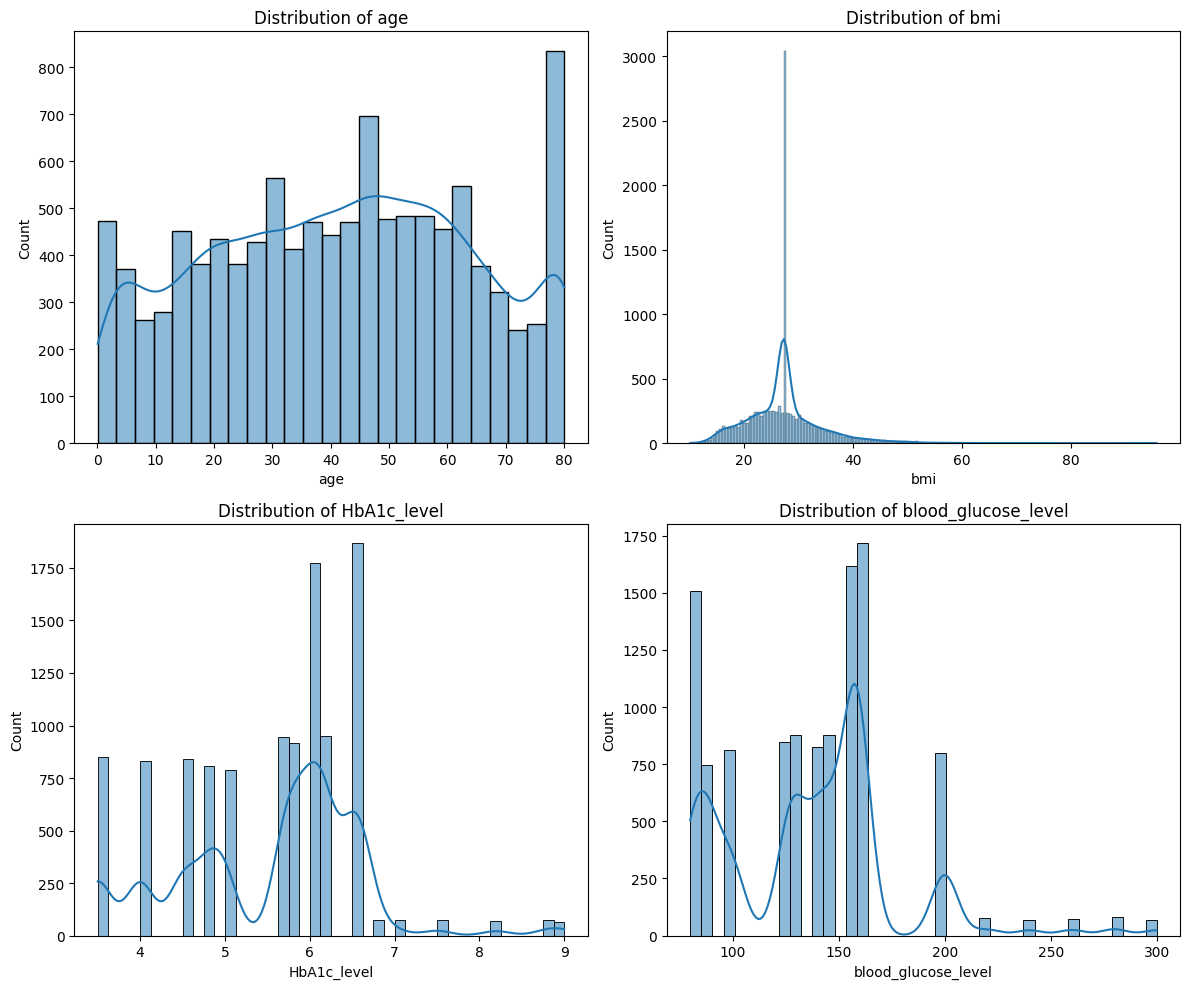

In [122]:
# 1. Visualize the Distribution of Numerical Features
# Histograms for age, bmi, HbA1c_level, and blood_glucose_level

# List of numerical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Set up the figure and axis
plt.figure(figsize=(12, 10))

# Loop through the numerical features and create a subplot for each
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


##### Check the Distribution of the Target Variable (Diabetes)

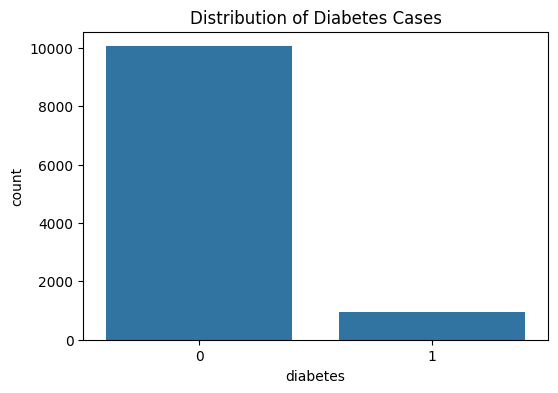

In [123]:
#Check the distribution of the Target variable(Diabetes)
plt.figure(figsize=(6,4))
sns.countplot(x='diabetes', data=data)
plt.title("Distribution of Diabetes Cases")
plt.show()

##### Correlation Matrix

##### Display a heatmap to understand correlations between numerical features

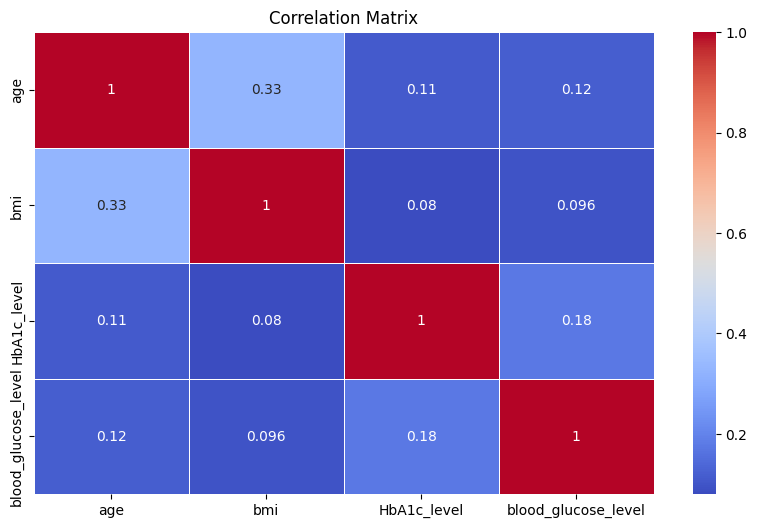

In [124]:
plt.figure(figsize=(10, 6))
corr_matrix = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

##### Boxplots to Detect Outliers in Numerical Features

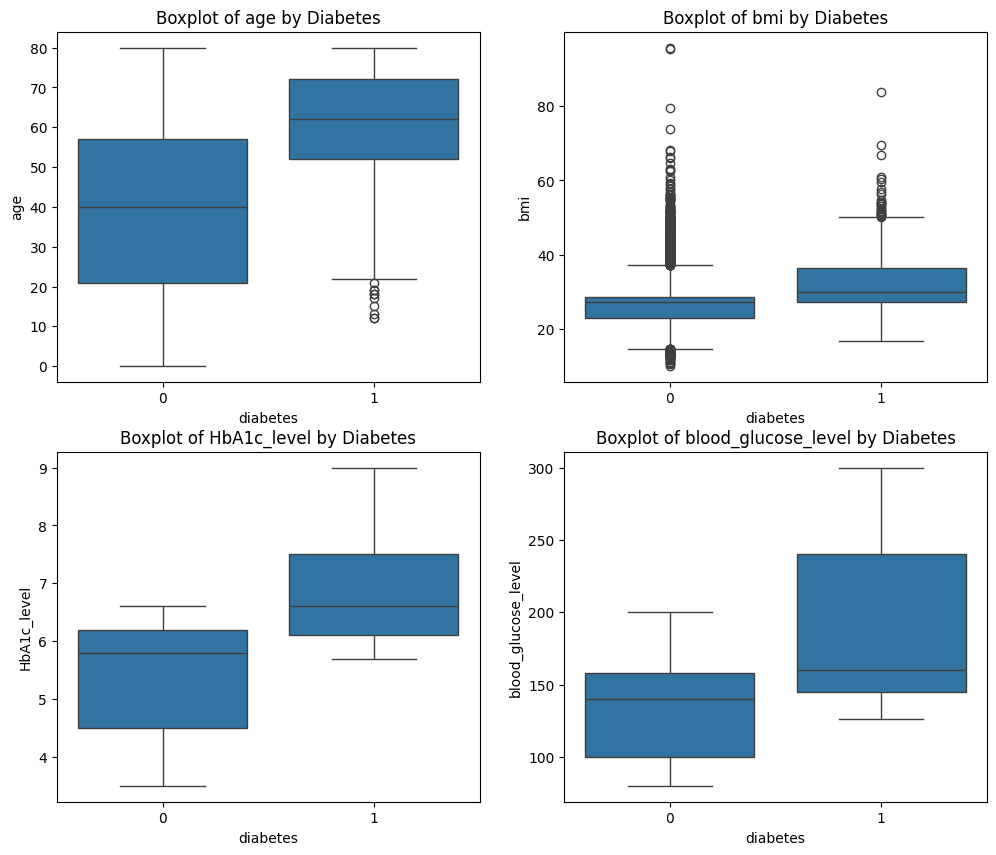

In [125]:
# Set up the figure and axis for a 2x2 grid of subplots
plt.figure(figsize=(12, 10))
# loop through the numerical features and create a subplot for each
for i, feature in enumerate(numerical_features, 1):  # starts from 1
    plt.subplot(2, 2, i)
    sns.boxplot(x = 'diabetes', y = feature, data = data)
    plt.title(f'Boxplot of {feature} by Diabetes')
plt.show()

##### Pairplot to Explore Relationships Between Variables

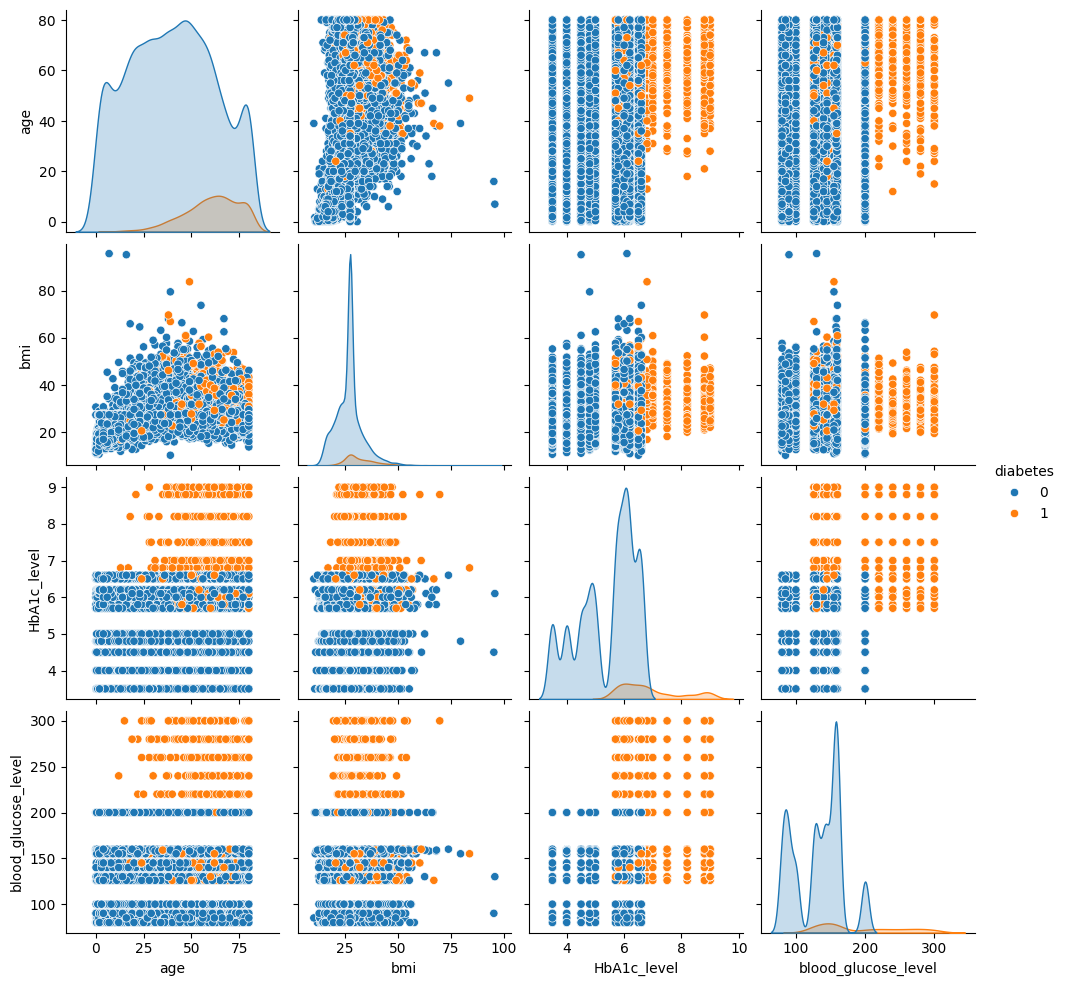

In [126]:
sns.pairplot(data[numerical_features + ['diabetes']], hue = 'diabetes')
plt.show()

#### Data Preprocessing
This step focuses on preparing the dataset for modeling. It includes handling missing values, removing duplicates, encoding categorical variables, scaling numerical features, and splitting the dataset.

##### Handling Missing Values

+ There are no missing values

##### Handling Duplicates

In [127]:
data.duplicated().sum()

np.int64(62)

In [128]:
# Drop duplicates
data = data.drop_duplicates()

In [129]:
# Comfirm that duplcates has been dropped.
data.duplicated().sum()

np.int64(0)

##### Encode Categorical Variables
We will use OneHotEncoder for 'gender' and 'smoking_history'

##### Split the Dataset into Training and Testing sets

In [130]:
train_ds, test_ds = train_test_split(data, test_size = 0.2, random_state = 42, stratify = data['diabetes'])

##### Apply transformations to training data


In [131]:
# df['age_group'] = pd.cut(df['age'], bins=[0, 14, 24, 64, 100], 
#                          labels=['Children', 'Young Adult', 'Adult', 'Senior'])

In [132]:
# Encode the 'gender' and 'smoking_history' column for the training set
train_encoded = pd.get_dummies(train_ds, columns=['gender', 'smoking_history'], drop_first=True)

In [133]:
# Encode the 'gender' and 'smoking_history' column for the testing set
test_encoded = pd.get_dummies(test_ds, columns=['gender', 'smoking_history'], drop_first=True)

# Align the columns of the test set with the training set
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

In [134]:
# Separate features and target for training set
X_train = train_encoded.drop('diabetes', axis=1)
y_train = train_encoded['diabetes']

# Separate features and target for test set
X_test = test_encoded.drop('diabetes', axis=1)
y_test = test_encoded['diabetes']

##### Resample the Training Set

In [135]:
# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training set
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Convert resampled arrays back to DataFrame for consistency
X_train_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
y_train_resampled = pd.Series(y_resampled, name='diabetes')

In [136]:
X_train_resampled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,21.0,0,0,23.31,4.8,90,False,False,False,False,True,False
1,78.0,0,0,33.83,4.5,140,True,False,False,False,False,True
2,43.0,0,0,29.51,4.0,159,False,False,False,False,True,False
3,46.0,0,0,29.21,4.8,85,True,False,False,False,False,True
4,35.0,0,0,27.02,4.0,200,False,False,False,False,True,False


In [137]:
X_train_resampled.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Male', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

##### Prepare data without outlier for Logistic Regression

In [138]:
# Function to cap outliers based on IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values at the lower and upper bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Cap outliers in "bmi" and "age"
data_capped = cap_outliers_iqr(data, 'bmi')
data_capped = cap_outliers_iqr(data_capped, 'age')

print(data_capped.describe())  # Check statistics after capping outliers

                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  10937.000000  10937.000000   10937.000000  10937.000000  10937.000000   
mean      41.552353      0.073603       0.038127     26.983818      5.531270   
std       22.562225      0.261136       0.191513      5.724311      1.071385   
min        0.080000      0.000000       0.000000     14.530000      3.500000   
25%       23.000000      0.000000       0.000000     23.560000      4.800000   
50%       42.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     29.580000      6.200000   
max       80.000000      1.000000       1.000000     38.610000      9.000000   

       blood_glucose_level      diabetes  
count         10937.000000  10937.000000  
mean            138.167231      0.087044  
std              40.481754      0.281912  
min              80.000000      0.000000  
25%             100.000000      0.000000  
50%             140.0

In [139]:
train_capped_ds, test_capped_ds = train_test_split(data_capped, test_size = 0.2, random_state = 42, stratify = data['diabetes'])

In [140]:
# Encode the 'gender' and 'smoking_history' column for the training set
train_capped_encoded = pd.get_dummies(train_capped_ds, columns=['gender', 'smoking_history'], drop_first=True)

# Encode the 'gender' and 'smoking_history' column for the training set
test_capped_encoded = pd.get_dummies(test_capped_ds, columns=['gender', 'smoking_history'], drop_first=True)

# Align the columns of the test set with the training set
test_capped_encoded = test_capped_encoded.reindex(columns=train_capped_encoded.columns, fill_value=0)

# Separate features and target for training set
X_capped_train = train_capped_encoded.drop('diabetes', axis=1)
y_capped_train = train_capped_encoded['diabetes']

# Separate features and target for test set
X_capped_test = test_capped_encoded.drop('diabetes', axis=1)
y_capped_test = test_capped_encoded['diabetes']

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training set
X_capped_resampled, y_capped_resampled = ros.fit_resample(X_capped_train, y_capped_train)

# Convert resampled arrays back to DataFrame for consistency
X_capped_train_resampled = pd.DataFrame(X_capped_resampled, columns=X_train.columns)
y_capped_train_resampled = pd.Series(y_capped_resampled, name='diabetes')

#### Model Selection
I will start by training a baseline model using Logistic Regression and then move on to more complex models like Decision Trees, Random Forests, and Gradient Boosting.

##### Logistic regression

In [141]:
# Instantiate model
log_reg = LogisticRegression(random_state=42)

# Define hyperparameter for model
# param_grid_lr = {
#     'log_reg__C': [0.1, 1, 10],
# }

param_grid_lr = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 'liblinear' supports 'l1' and 'l2'
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid_search_lr = GridSearchCV(estimator = log_reg, param_grid = param_grid_lr, cv=5, scoring = scoring, refit = 'f1')

In [142]:
%%time
# grid_search_lr.fit(X_capped_train_resampled, y_capped_train_resampled)

CPU times: total: 0 ns
Wall time: 0 ns


In [143]:
# joblib.dump(grid_search_lr, "grid_search_lr.pkl")

In [144]:
grid_search_lr = joblib.load("grid_search_lr.pkl")

In [145]:
grid_search_lr.best_score_

np.float64(0.8911150001228322)

##### Fit the Models on Training Data

##### Decision Tree

In [147]:
decision_tree = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    }

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid_search_dt = GridSearchCV(estimator = decision_tree, param_grid = param_grid_dt, cv=5, scoring = scoring, refit = 'f1')

In [148]:
%%time
# grid_search_dt.fit(X_train_resampled, y_train_resampled)

CPU times: total: 0 ns
Wall time: 0 ns


In [149]:
# joblib.dump(grid_search_dt, "grid_search_dt.pkl")

In [150]:
grid_search_dt = joblib.load("grid_search_dt.pkl")

In [151]:
grid_search_dt.best_score_

np.float64(0.9242304452512116)

##### Random Forest

In [152]:
random_forest = RandomForestClassifier(random_state=42)

param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    }

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid_search_rf = GridSearchCV(estimator = random_forest, param_grid = param_grid_rf, cv=5, scoring = scoring, refit = 'f1')

In [153]:
%%time
# grid_search_rf.fit(X_train_resampled, y_train_resampled)

CPU times: total: 0 ns
Wall time: 0 ns


In [154]:
# joblib.dump(grid_search_rf, "grid_search_rf.pkl")

In [155]:
grid_search_rf = joblib.load("grid_search_rf.pkl")

In [156]:
grid_search_rf.best_score_

np.float64(0.935730502570706)

In [157]:
xgboost = XGBClassifier(objective='binary:logistic', random_state=42) 

param_grid_xgb =  {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Assign a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid_search_xgb = GridSearchCV(estimator = xgboost, param_grid = param_grid_xgb, cv=5, scoring = scoring, refit = 'f1')

In [158]:
%%time
# grid_search_xgb.fit(X_train_resampled, y_train_resampled)

CPU times: total: 0 ns
Wall time: 0 ns


In [159]:
# joblib.dump(grid_search_xgb, "grid_search_xgb.pkl")

In [160]:
grid_search_xgb = joblib.load("grid_search_xgb.pkl")

In [161]:
grid_search_xgb.best_score_

np.float64(0.990021279174309)

###### Test Best Model

In [162]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [163]:
# Get predictions on test data
xgboost_test_scores = get_scores("XGBoost test", grid_search_xgb, X_test, y_test)

In [164]:
xgboost_test_scores

,model,precision,recall,f1,accuracy,AUC
0,XGBoost test,0.815642,0.768421,0.791328,0.964808,0.875952


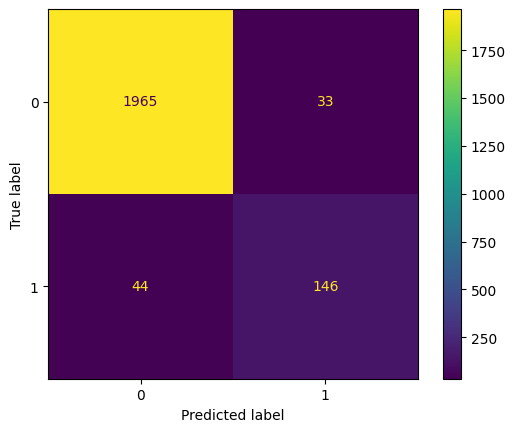

In [165]:
# Generate array of values for confusion matrix
preds = grid_search_xgb.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=grid_search_xgb.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_search_xgb.classes_)
disp.plot(values_format='');